/home/lazar/Fak(s)/AF/prakse/SDSA/data/3481_11923_SHARP_CEA_enhanced_norm/hmi.sharp_cea_720s.3481.20131213_111200_TAI.enhanced_normalized.fits


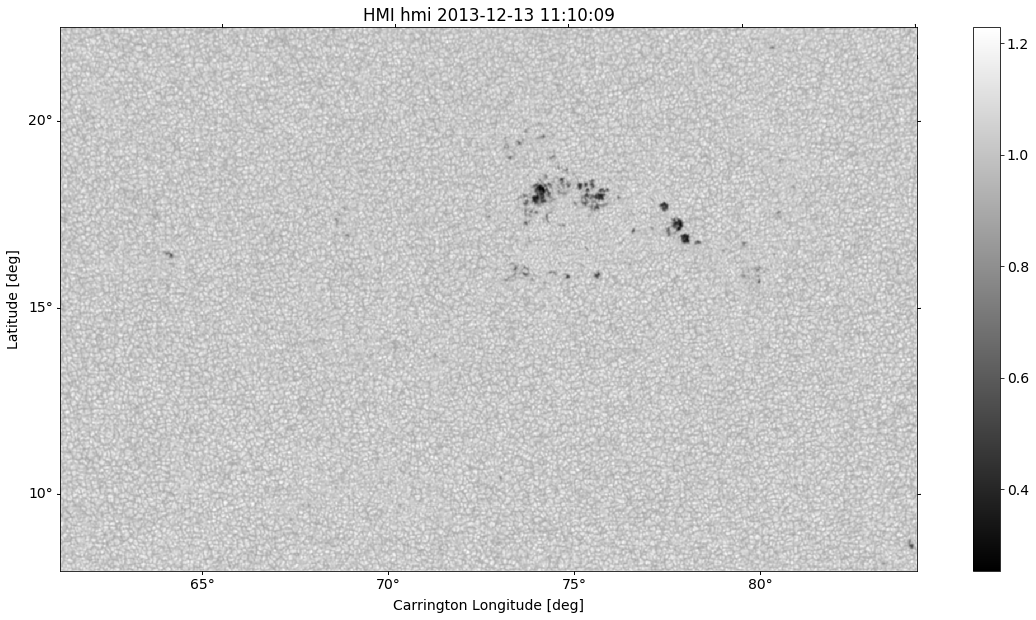

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
import numpy as np
from scipy.spatial import distance_matrix

import astropy.units as u
from astropy.coordinates import SkyCoord
from sunpy.coordinates import frames


import os
import glob
# This makes nice big plots for matplotlib
import matplotlib as mpl
params = {'font.size': 14,
          'figure.figsize': (20.0, 10.0),
          'lines.linewidth': 2.,
          'lines.markersize': 15,
          'animation.embed_limit': 2048,
          }
mpl.rcParams.keys()
mpl.rcParams.update(params)
np.set_printoptions(suppress=True)

import sunpy.map
from sunpy.coordinates import frames

data_dir = os.path.abspath("/home/lazar/Fak(s)/AF/prakse/SDSA/data")

cont_list = sorted(glob.glob(os.path.join(
    data_dir, "3481_11923_SHARP_CEA_enhanced_norm/*enhanced_normalized*")))


magnetic_data_dir = os.path.join(
    data_dir, "3481_11923_SHARP_CEA_upscaled_magnetic_data")
Br_list = sorted(glob.glob(os.path.join(
    magnetic_data_dir, "*Br*")))
Bp_list = sorted(glob.glob(os.path.join(
    magnetic_data_dir, "*Bp*")))
Bt_list = sorted(glob.glob(os.path.join(
    magnetic_data_dir, "*Bt*")))
patches_dir = os.path.join(data_dir, "3481_11923_SHARP_CEA_patches")
patches_list = sorted(glob.glob(os.path.join(patches_dir, "*patches*")))
print(cont_list[600])
mapa = sunpy.map.Map(cont_list[600])
helioproj_limb = sunpy.map.all_coordinates_from_map(mapa).transform_to(
        frames.Helioprojective(observer=mapa.observer_coordinate))
mapa.peek()

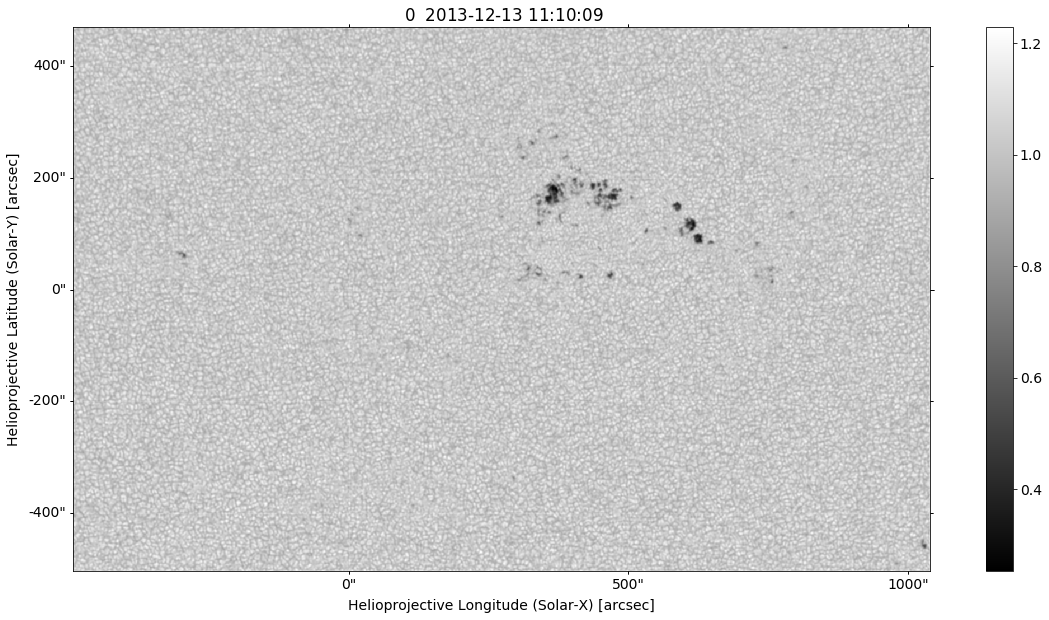

In [4]:
#print(dir(mapa))
#print(mapa.world_to_pixel)

#Fetch the coordinates of reference pixel
hpc1 = SkyCoord(mapa.reference_coordinate, frame=mapa.coordinate_frame)  


#print(mapa.obstime)
#Create reference frame for helioprojective with observer coordinates and observer date
hps1 = sunpy.coordinates.Helioprojective(observer=mapa.observer_coordinate, obstime=mapa.date)

#Transform carrington to helioprojective
hp = hpc1.transform_to(hps1)



#print(hpc1.transform_to(hps1))
#reference_helioproj = mapa.reference_coordinate.transform_to(frames.)
helioproj_limb = sunpy.map.all_coordinates_from_map(mapa).transform_to(
        frames.Helioprojective(observer=mapa.observer_coordinate))



#my_coord = SkyCoord(0*u.arcsec, 0*u.arcsec, obstime="2017-08-01",
#                    observer = 'earth', frame=frames.Helioprojective)

my_header = sunpy.map.make_fitswcs_header(mapa.data, hp)

#print(my_header)
my_map = sunpy.map.Map(mapa.data, my_header)

#my_map
my_map.peek()


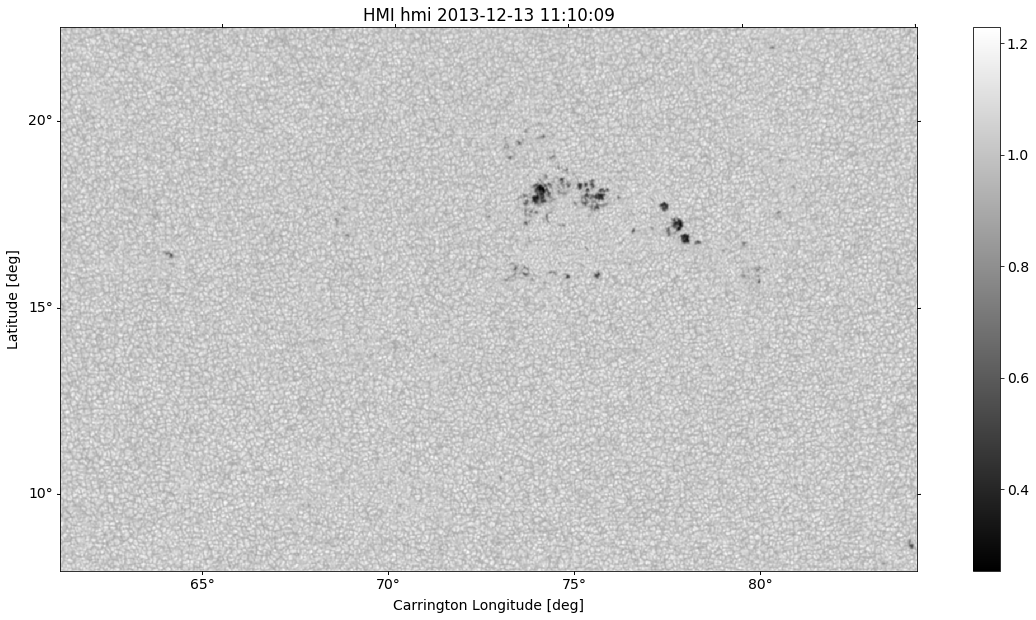

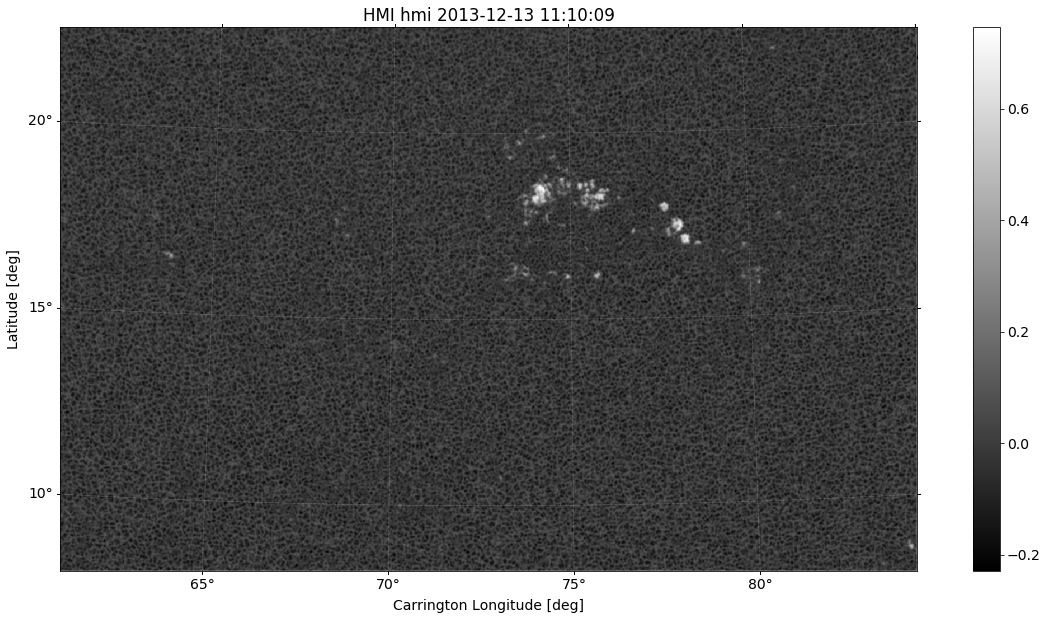

SpatialPair(axis1=<Quantity 0.015 deg / pix>, axis2=<Quantity 0.015 deg / pix>)
SpatialPair(axis1=<Quantity 0.50436 arcsec / pix>, axis2=<Quantity 0.50436 arcsec / pix>)


In [5]:
from skimage.filters import median
from skimage.measure import label, regionprops
from skimage.morphology import opening, square, watershed, white_tophat, disk
from skimage.util import invert

map1 = sunpy.map.Map("../../hmi.Ic_noLimbDark_720s.20120806_120000_TAI.1.continuum.fits")
#map1 = map1.resample((1024, 1024)*u.pix)
#map1.peek()
#mapa_full_disk = sunpy.map.Map(invert(map1.data), map1.meta)
#mapa_full_disk.peek()
mapa.peek()
data = invert(mapa.data)
new_map = sunpy.map.Map(data, mapa.meta)
new_map.peek()
circle_radius = 40 * u.arcsec
median_box = 10 * u.arcsec
print(mapa.scale)
print(map1.scale)

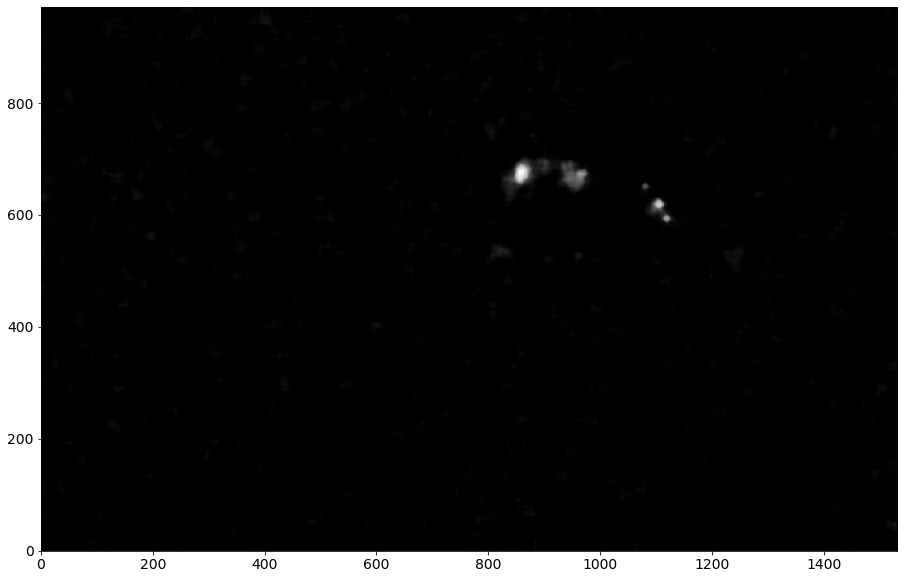

In [86]:
data = invert(mapa.data)
#plt.imshow(data,cmap='gray')
#plt.colorbar()
#print(square(15))
med = median(data, square(20))
plt.imshow(med, cmap='gray', origin='lower')


In [55]:
from skimage.morphology import opening, square, watershed, white_tophat, disk
from skimage.measure import label, regionprops

def detekt_shit(spmap, sqr=30, dsk=40):
    '''
    data - Input data array
    sqr - size of square to be used in median filter
    disk - morphological structure for tophat
    '''
    data = invert(spmap.data)
    med = median(data, disk(sqr))
    #plt.figure(1)
    #plt.imshow(med, cmap='gray', origin='lower')
    circle=disk(dsk)
    th = white_tophat(med, circle)
    #plt.figure(2)
    #plt.imshow(th, cmap='gray', origin='lower')
    finite = th
    finite[np.isnan(th)] = 0

    segmentation = finite > np.percentile(finite, 99.8)
    labelled = label(segmentation)
    regions = regionprops(labelled)
    #plt.figure(3)

    #ax = plt.subplot(projection=mapa)
    #mapa.plot()
    #plt.xlim([700, 1200])
    #plt.ylim([500, 800])
    #ax.add_patch(Circle((900, 600), dsk,
    #                      fill=False, zorder=10, linewidth=1, edgecolor='r', facecolor='none'))
    #ax.contour(segmentation, levels=0)
    #plt.savefig('JEDAN.jpg')
    #plt.show()
    return segmentation, labelled

    

In [103]:
segments, labelz = detekt_shit(mapa, sqr=6, dsk=25)

/home/lazar/Fak(s)/AF/prakse/SDSA/hmi_data/venv/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))




# Idemo sa 8 za median i 25 za disk na ovoj rezoluciji
# Ako je oblast manja od ~100 pix = ~1.5 arcsec u poluprecniku

/home/lazar/Fak(s)/AF/prakse/SDSA/hmi_data/venv/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:225: UserWarning: No contour levels were found within the data range.
  cset = super().contour(*args, **kwargs)


(500, 800)

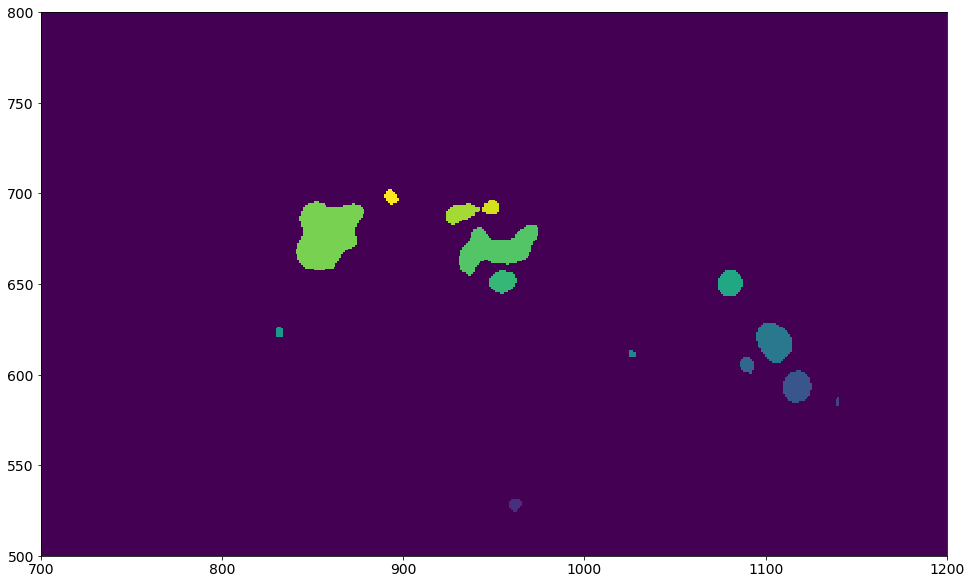

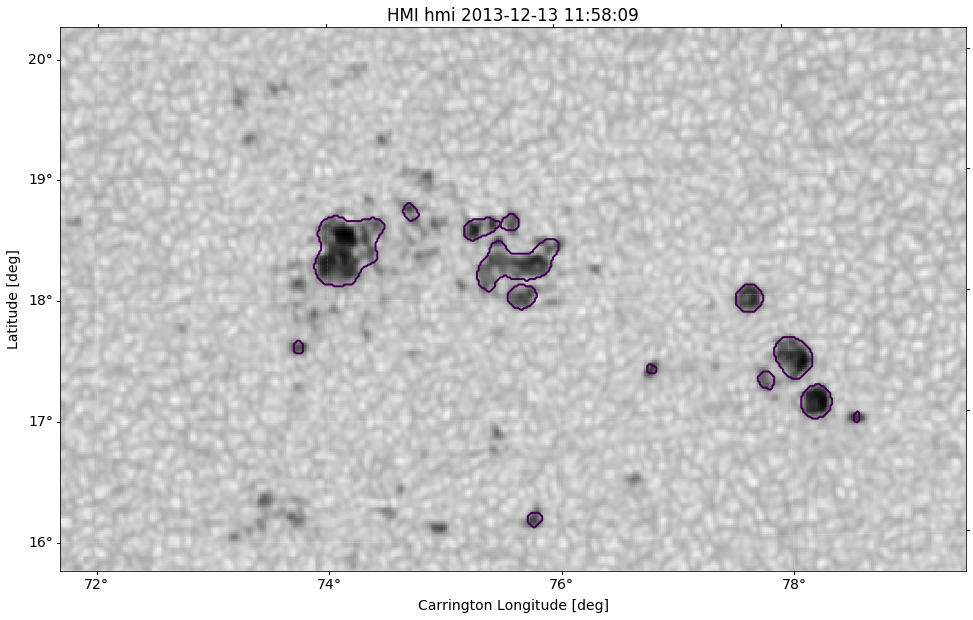

In [104]:
plt.xlim([700, 1200])
plt.ylim([500, 800])
plt.figure(1)
plt.imshow(labelz, origin='lower')
plt.figure(2)

ax = plt.subplot(projection=mapa)
mapa.plot()
ax.contour(segments, levels=0)
plt.xlim([700, 1200])
plt.ylim([500, 800])

/home/lazar/Fak(s)/AF/prakse/SDSA/data/3481_11923_SHARP_CEA_enhanced_norm/hmi.sharp_cea_720s.3481.20131213_111200_TAI.enhanced_normalized.fits


/home/lazar/Fak(s)/AF/prakse/SDSA/hmi_data/venv/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/home/lazar/Fak(s)/AF/prakse/SDSA/hmi_data/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: No contour levels were found within the data range.
  del sys.path[0]


/home/lazar/Fak(s)/AF/prakse/SDSA/data/3481_11923_SHARP_CEA_enhanced_norm/hmi.sharp_cea_720s.3481.20131213_112400_TAI.enhanced_normalized.fits
/home/lazar/Fak(s)/AF/prakse/SDSA/data/3481_11923_SHARP_CEA_enhanced_norm/hmi.sharp_cea_720s.3481.20131213_113600_TAI.enhanced_normalized.fits
/home/lazar/Fak(s)/AF/prakse/SDSA/data/3481_11923_SHARP_CEA_enhanced_norm/hmi.sharp_cea_720s.3481.20131213_114800_TAI.enhanced_normalized.fits
/home/lazar/Fak(s)/AF/prakse/SDSA/data/3481_11923_SHARP_CEA_enhanced_norm/hmi.sharp_cea_720s.3481.20131213_120000_TAI.enhanced_normalized.fits
/home/lazar/Fak(s)/AF/prakse/SDSA/data/3481_11923_SHARP_CEA_enhanced_norm/hmi.sharp_cea_720s.3481.20131213_121200_TAI.enhanced_normalized.fits
/home/lazar/Fak(s)/AF/prakse/SDSA/data/3481_11923_SHARP_CEA_enhanced_norm/hmi.sharp_cea_720s.3481.20131213_122400_TAI.enhanced_normalized.fits
/home/lazar/Fak(s)/AF/prakse/SDSA/data/3481_11923_SHARP_CEA_enhanced_norm/hmi.sharp_cea_720s.3481.20131213_123600_TAI.enhanced_normalized.fits

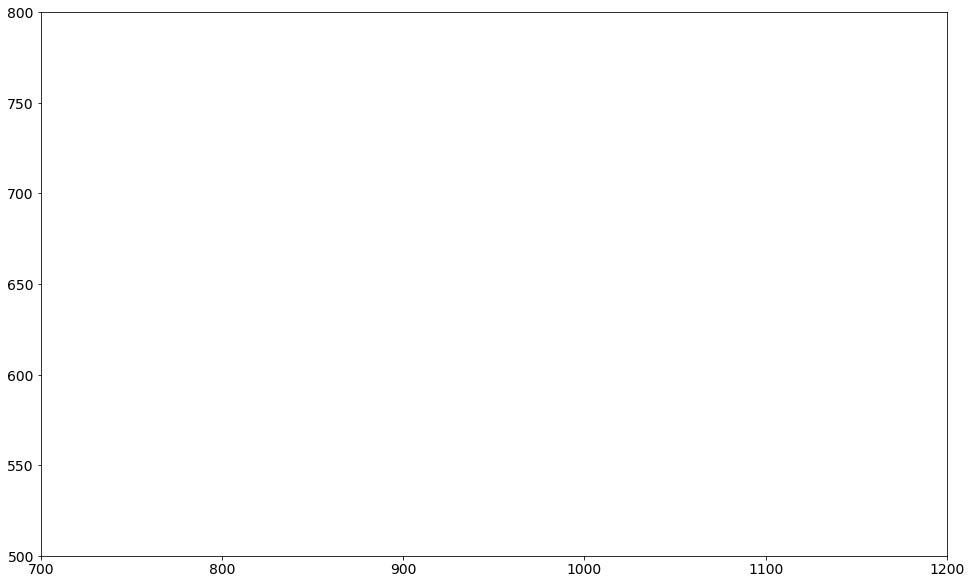

In [108]:
from celluloid import Camera
fig, ax = plt.subplots()
camera = Camera(fig)
ax.set_xlim([700, 1200])
ax.set_ylim([500, 800])

for i in range(600,610):
    print(cont_list[i])
    mapa = sunpy.map.Map(cont_list[i])
    segments, labelz = detekt_shit(mapa, sqr=8, dsk=20)
    plt.imshow(mapa.data, origin='lower',cmap='gray')
    #mapa.plot()
    ax.contour(segments, levels=0)
    camera.snap()

animation = camera.animate(interval=300)
#uncomment this for live preview in jupyter notebook
from IPython.display import HTML
HTML(animation.to_html5_video())
